<a href="https://colab.research.google.com/github/deeplearningmn/AIEng/blob/main/Copy_of_AIEng_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Өгөгдөл үүсгэх (NumPy ашиглан)
sales = np.array([100, 150, 200, 130, 180])

In [16]:
# 2. DataFrame болгож боловсруулах (pandas ашиглан)
primeMovies  = pd.DataFrame({
'Name': ['Interstellar','Frozen','Inception', 'Oppenheimer', 'Shrek'],
'Genre': ['Sci-Fi','Animation', 'Sci-Fi','History', 'Comedy' ],
'Rating': [8.8, 8.9, 7.8, 9.0, 7.2]
})
urgooMovies  = pd.DataFrame({
'Name': ['Inception', 'Interstellar', 'Frozen', 'Shrek', 'Oppenheimer'],
'Genre': ['Sci-Fi', 'Sci-Fi', 'Animation', 'Comedy', 'History'],
'Rating': [9.0, 8.5, 7.5, 8.0, 9.2]
})
merged_movies = pd.merge(primeMovies, urgooMovies, on='Name', suffixes=('_prime', '_urgoo'))
merged_movies['Rating'] = (merged_movies['Rating_prime'] + merged_movies['Rating_urgoo']) / 2
movies = merged_movies[['Name', 'Genre_prime', 'Rating']].rename(columns={'Genre_prime': 'Genre'})
movies_sorted = movies.sort_values(by='Rating', ascending=True)
movies_sorted['Name_Genre'] = movies_sorted['Name'] + ' (' + movies_sorted['Genre'] + ')'
print(movies_sorted.sort_values(by='Rating', ascending=False))

           Name      Genre  Rating             Name_Genre
3   Oppenheimer    History    9.10  Oppenheimer (History)
0  Interstellar     Sci-Fi    8.65  Interstellar (Sci-Fi)
2     Inception     Sci-Fi    8.40     Inception (Sci-Fi)
1        Frozen  Animation    8.20     Frozen (Animation)
4         Shrek     Comedy    7.60         Shrek (Comedy)


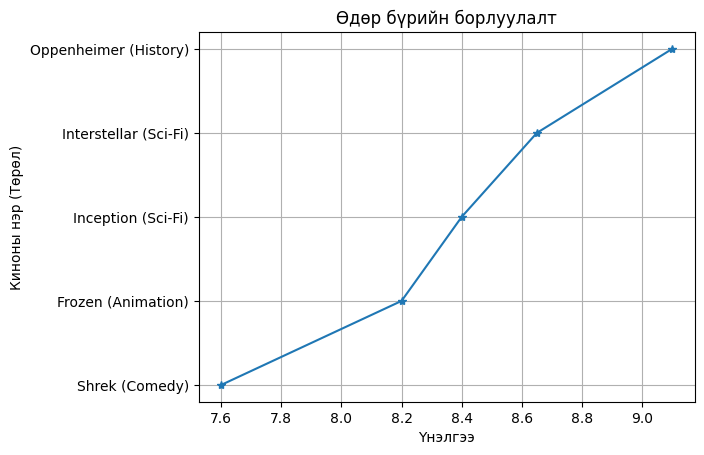

In [17]:
# 3. Харагдацыг гаргах (matplotlib ашиглан)
plt.plot(movies_sorted['Rating'],movies_sorted['Name_Genre'],  marker='*')
plt.title("Дундаж үнэлгээ")
plt.xlabel("Үнэлгээ")
plt.ylabel("Киноны нэр (Төрөл)")
plt.grid(True)
plt.show()

3D харагдацаар

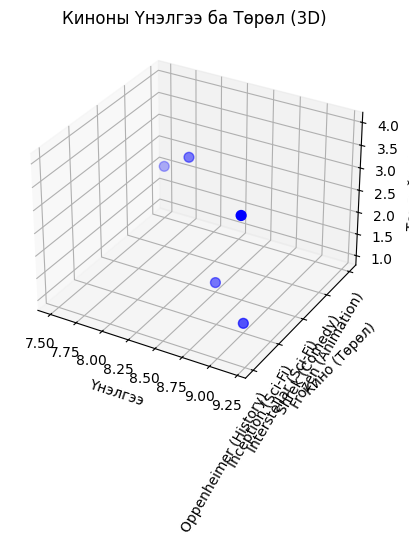

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# DataFrame үүсгэх
movies = pd.DataFrame({
    'Name': ['Inception', 'Interstellar', 'Frozen', 'Shrek', 'Oppenheimer'],
    'Genre': ['Sci-Fi', 'Sci-Fi', 'Animation', 'Comedy', 'History'],
    'Rating': [9.0, 8.5, 7.5, 8.0, 9.2]
})

# Rating-ээр эрэмбэлэх
movies_sorted = movies.sort_values(by='Rating', ascending=False)

# Name ба Genre нэгтгэх
movies_sorted['Name_Genre'] = movies_sorted['Name'] + ' (' + movies_sorted['Genre'] + ')'

# Genre-ийг тоон утга болгох
genre_mapping = {'Sci-Fi': 1, 'Animation': 2, 'Comedy': 3, 'History': 4}
movies_sorted['Genre_Code'] = movies_sorted['Genre'].map(genre_mapping)

# 3D график зурах
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x: Rating, y: индекс, z: Genre_Code
x = movies_sorted['Rating']
y = range(len(movies_sorted))
z = movies_sorted['Genre_Code']

# Scatter график
ax.scatter(x, y, z, marker='o', s=50, c='blue')

# y тэнхлэгийн нэрсийг Name_Genre болгох
ax.set_yticks(range(len(movies_sorted)))
ax.set_yticklabels(movies_sorted['Name_Genre'], rotation=60, ha='right')

# Тэнхлэг ба гарчиг
ax.set_xlabel('Үнэлгээ')
ax.set_ylabel('Кино (Төрөл)')
ax.set_zlabel('Төрлийн Код')
plt.title('Киноны Үнэлгээ ба Төрөл (3D)')

plt.show()